In [1]:
import os
import sys
import numpy as np
import copy as cp
import matplotlib
import functools
# import imp
import importlib
import time
import datetime
import multiprocessing as mp
from matplotlib import path    as path
from matplotlib import pyplot  as plt
from matplotlib import patches as patches
from itertools  import product
from skimage    import data
from skimage    import io
from skimage    import util
from skimage    import img_as_float
from skimage    import exposure
from scipy      import signal  as signal
from scipy      import misc    as misc
from scipy      import ndimage as ndimage

import cv2
usecv2 = True

import img_def
importlib.reload(img_def)

<module 'img_def' from 'C:\\Users\\frankh\\python\\puzzle\\img_def.py'>

In [2]:
path = os.getcwd()
bwimorig = functools.partial(plt.imshow, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
bwimgray = functools.partial(plt.imshow, vmin=0, vmax=2,   cmap=plt.get_cmap('gray'))
bwimshow = functools.partial(plt.imshow, vmin=0, vmax=1,   cmap=plt.get_cmap('gray'))
def plot_a_b(imagea, imageb, VMAXA=1, VMAXB=1):
    plt.figure()
    ax = plt.subplot(1,2,1)
    bx = plt.subplot(1,2,2)
    im = ax.imshow(imagea, vmin=0, vmax=VMAXA, cmap=plt.get_cmap('gray'))
    im = bx.imshow(imageb, vmin=0, vmax=VMAXB, cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.show()

In [3]:
XXa = 360      # window center X
YYa = 240      # window center Y
A0a = XXa - 20  # window LL X
A1a = XXa + 21  # window LL Y
B0a = YYa - 20  # window UR X
B1a = YYa + 21  # window UR Y
XXb =  40
YYb = 440
A0b = XXb - 20  # window LL X
A1b = XXb + 21  # window LL Y
B0b = YYb - 20  # window UR X
B1b = YYb + 21  # window UR Y
ZB = 128      # upper limit for black
ZW = 127      # lower limit for white
BB = 0        # black
WW = 255      # white
A10a = A1a - A0a # window size X
B10a = B1a - B0a # window size Y
A10b = A1b - A0b # window size X
B10b = B1b - B0b # window size Y
if usecv2 == False:
  image = data.load(path + "\small.bmp")
if usecv2 == True:
  image = cv2.imread(path + "\small.bmp", cv2.IMREAD_GRAYSCALE)
X, Y = image.shape
print("X : {} : Y : {}".format(X, Y))
image = np.pad(image,((20,20),(20,20)), 'constant', constant_values=255)
X, Y = image.shape
print("X : {} : Y : {}".format(X, Y))

X : 714 : Y : 817
X : 754 : Y : 857


In [4]:
image = np.reshape(image,(1,X,Y))
image = np.lib.pad(image,((0,100),(0,0),(0,0)),'constant', constant_values=0)
smalla = image[:,A0a:A1a, B0a:B1a]
smallb = image[:,A0b:A1b, B0b:B1b]
index = 0
Z, X, Y = image.shape
print("Z : {} : X : {} : Y : {}".format(Z, X, Y))

Z : 101 : X : 754 : Y : 857


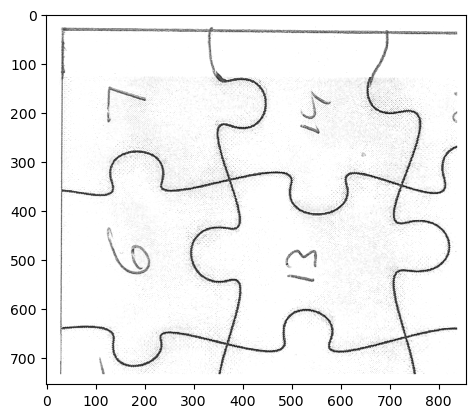

In [5]:
plt.figure()
bwimorig(image[index])
index+=1

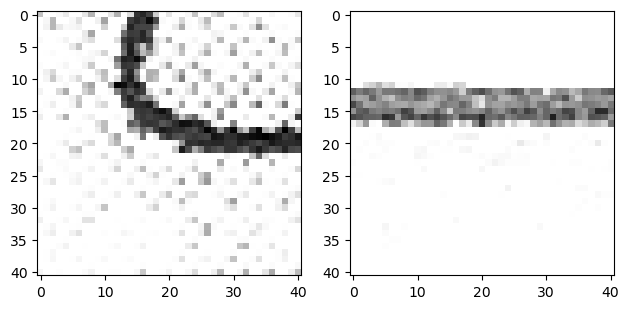

In [6]:
index-=1
plot_a_b(smalla[index], smallb[index], 255, 255)

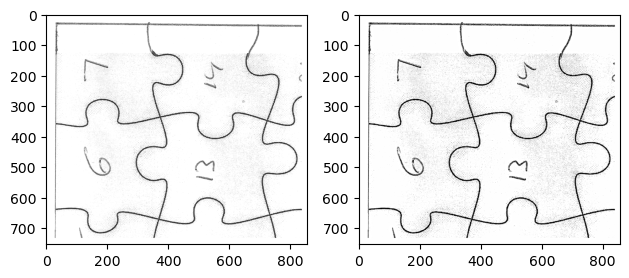

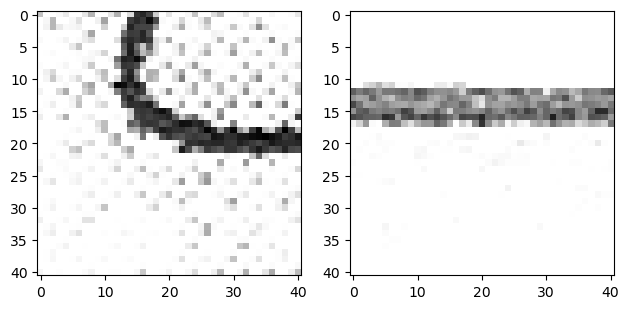

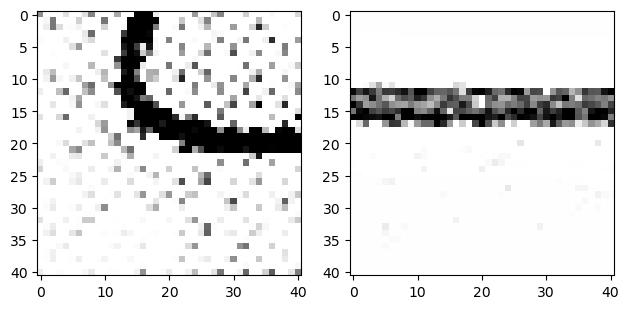

In [7]:
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump)
kernel = np.reshape(bump[:, np.newaxis] * bump[np.newaxis, :],(30,30))

image_orig  = image[index] / 256.0
image_blur  = ndimage.convolve(image_orig, kernel)
image_sharp = np.clip(2 * image_orig - image_blur, 0, 1)
image[index+1] = image_sharp * 255

plot_a_b(image[index],    image[index+1],  255, 255)
plot_a_b(smalla[index],   smallb[index],   255, 255)
plot_a_b(smalla[index+1], smallb[index+1], 255, 255)
index+=1

cntbb :    33915 : cntww :   612263 : trun :      119


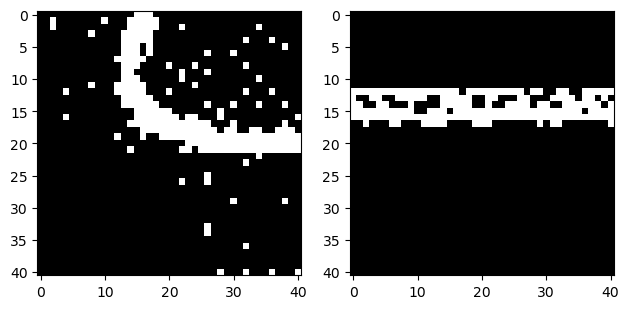

In [8]:
image[index+1] = img_def.img_filter_gray(image[index],ZB=128)
plot_a_b(smalla[index+1], smallb[index+1])
index+=1

cntbb :    25587 : cntww :   620591 : trun :      139


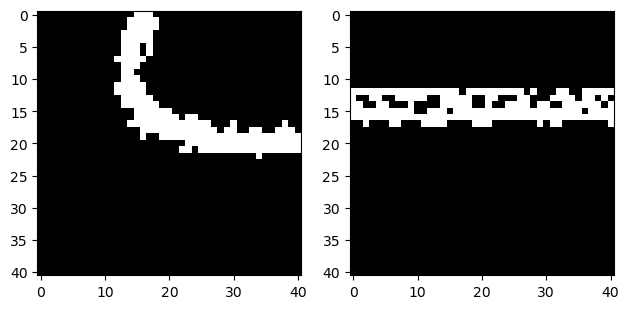

In [9]:
image[index+1] = img_def.img_filter_one_black(image[index])
plot_a_b(smalla[index+1], smallb[index+1])
index+=1

cntbb :    25146 : cntww :   621032 : trun :      603
cntbb :    25146 : cntww :   621032 : trun :      629


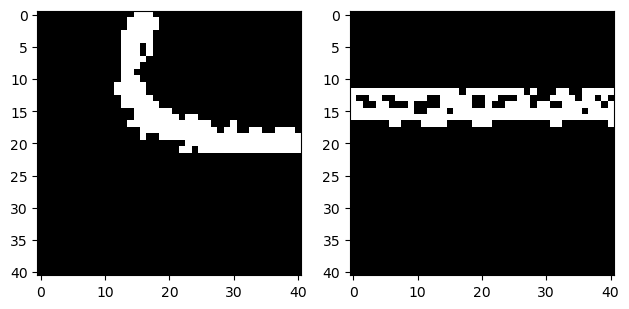

In [10]:
image[index+1] = img_def.img_filter_one_edgeA(image[index])
index+=1
image[index+1] = img_def.img_filter_one_edgeA(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    24786 : cntww :   621392 : trun :     1077
cntbb :    24739 : cntww :   621439 : trun :     1072


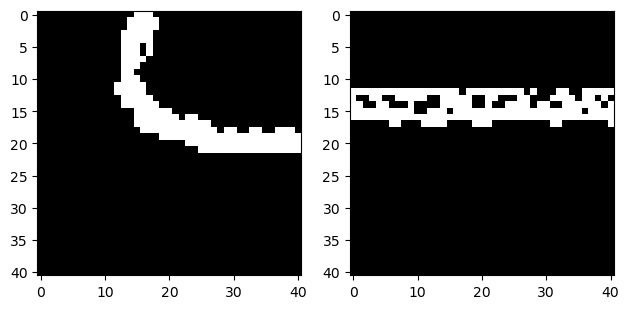

In [11]:
image[index+1] = img_def.img_filter_one_edgeB(image[index])
index+=1
image[index+1] = img_def.img_filter_one_edgeB(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25005 : cntww :   621173 : trun :      606
cntbb :    25005 : cntww :   621173 : trun :      636


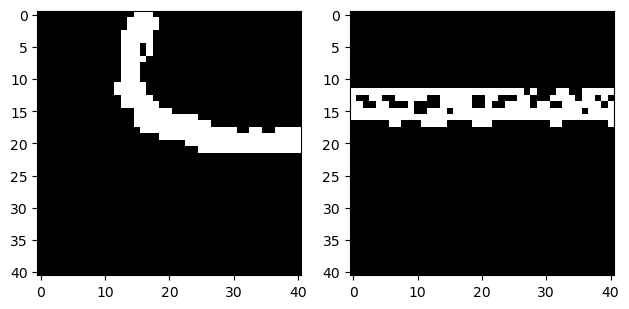

In [12]:
image[index+1] = img_def.img_filter_one_fillA(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillA(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25166 : cntww :   621012 : trun :     1017
cntbb :    25180 : cntww :   620998 : trun :     1030


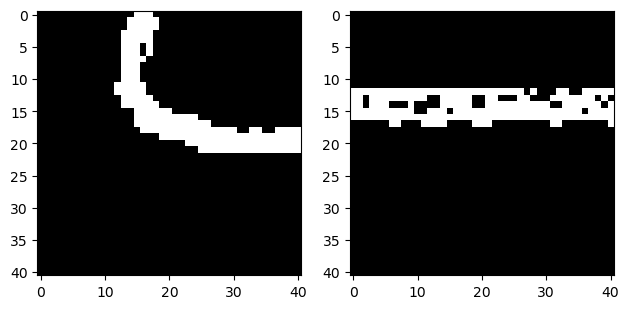

In [13]:
image[index+1] = img_def.img_filter_one_fillB(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillB(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25180 : cntww :   620998 : trun :     1026
cntbb :    25180 : cntww :   620998 : trun :     1010


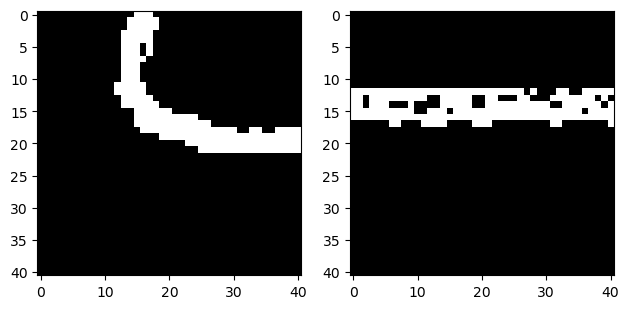

In [14]:
image[index+1] = img_def.img_filter_one_fillB(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillB(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25522 : cntww :   620656 : trun :      377
cntbb :    25610 : cntww :   620568 : trun :      383


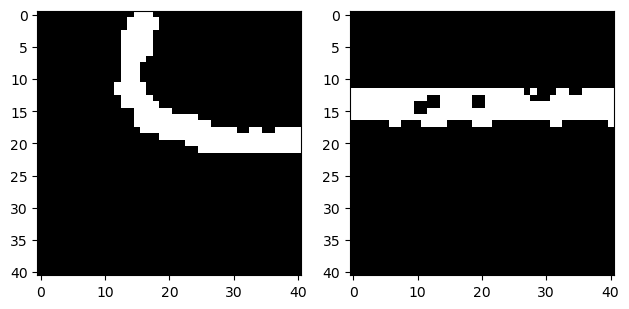

In [15]:
image[index+1] = img_def.img_filter_one_fillC(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillC(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25609 : cntww :   620569 : trun :      601
cntbb :    25609 : cntww :   620569 : trun :      586


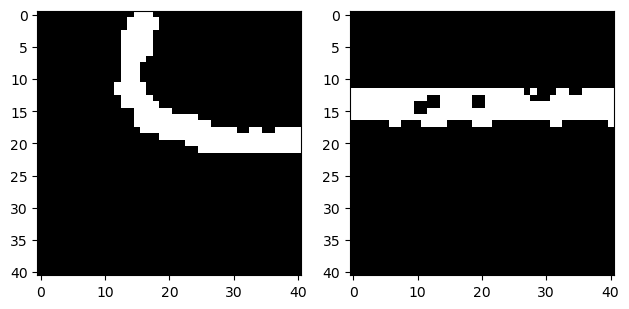

In [16]:
image[index+1] = img_def.img_filter_one_edgeA(image[index])
index+=1
image[index+1] = img_def.img_filter_one_edgeA(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25598 : cntww :   620580 : trun :      994
cntbb :    25597 : cntww :   620581 : trun :     1023


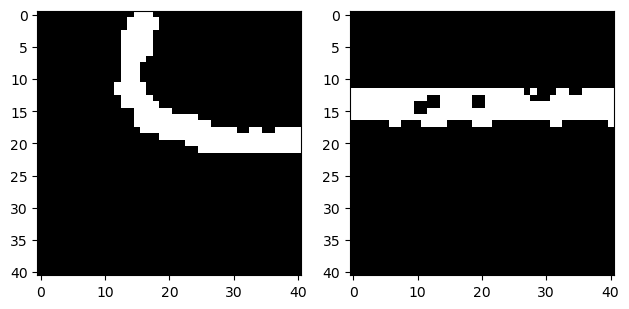

In [17]:
image[index+1] = img_def.img_filter_one_edgeB(image[index])
index+=1
image[index+1] = img_def.img_filter_one_edgeB(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    25920 : cntww :   620258 : trun :      627
cntbb :    25924 : cntww :   620254 : trun :      634


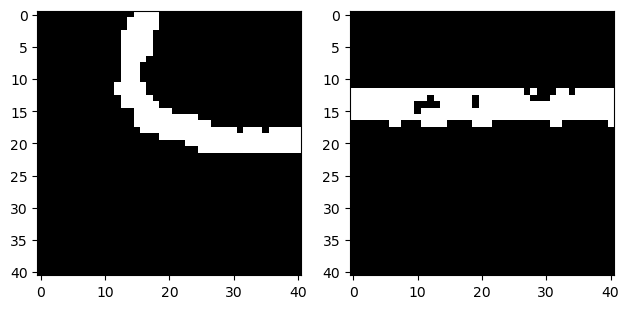

In [18]:
image[index+1] = img_def.img_filter_one_fillD(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillD(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    26418 : cntww :   619760 : trun :      604
cntbb :    26442 : cntww :   619736 : trun :      605


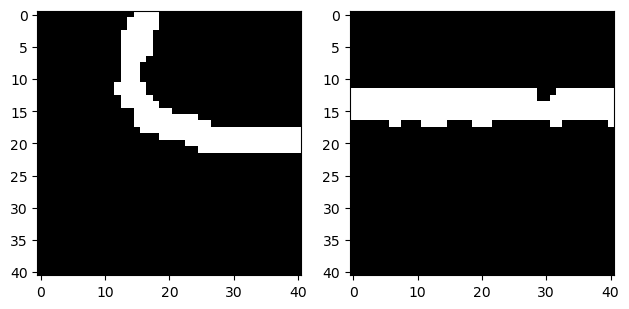

In [19]:
image[index+1] = img_def.img_filter_one_fillE(image[index])
index+=1
image[index+1] = img_def.img_filter_one_fillE(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

cntbb :    26377 : cntww :   619801 : trun :     1047
cntbb :    26377 : cntww :   619801 : trun :     1050


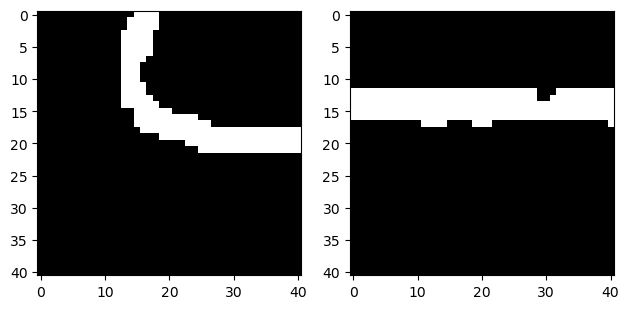

In [20]:
image[index+1] = img_def.img_filter_two_edgeA(image[index])
index+=1
image[index+1] = img_def.img_filter_two_edgeA(image[index])
index+=1
plot_a_b(smalla[index], smallb[index])

In [21]:
image[index+1] = 0 + image[index]
image[index+2] = 1 - image[index]

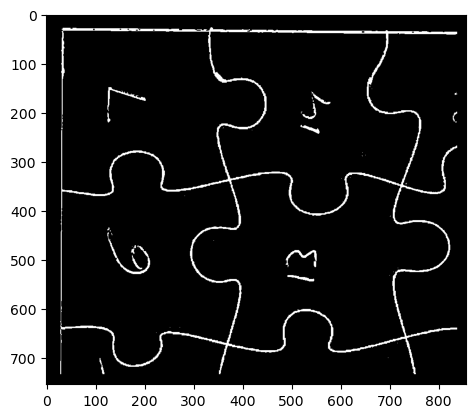

In [22]:
bwimshow(image[index+1])

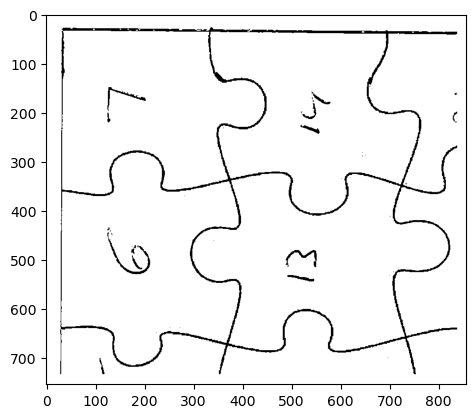

In [23]:
bwimshow(image[index+2])

cntbb :    26377 : cntww :   619801 : cntrr :     1090 : trun  :       42
cntvv :        0 : cnthh :        0 : cnt4s :        0 : cntcc :      247
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    26377 : cntww :   619801 : cntrr :     1040 : trun  :       38
cntvv :        0 : cnthh :        0 : cnt4s :        0 : cntcc :      255
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    26371 : cntww :   619807 : cntrr :     1106 : trun  :       36
cntvv :        0 : cnthh :        0 : cnt4s :        1 : cntcc :      188
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    26360 : cntww :   619818 : cntrr :     1110 : trun  :       36
cntvv :        0 : cnthh :        0 : cnt4s :        2 : cntcc :      199
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0


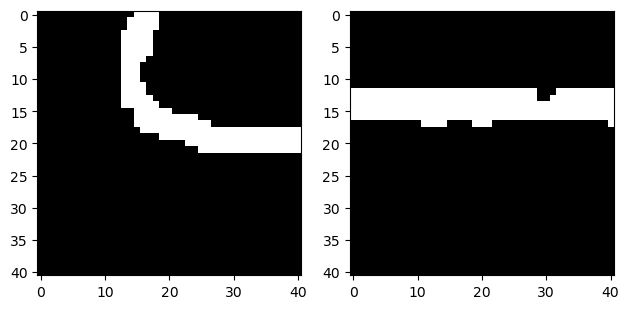

In [24]:
start_list = [0,5,10,15]
for start in start_list:
    img_def.img_filter_line_edgeA(image[index+1], image[index+2], 1, start=start, AB=20, method=['4S'])
plot_a_b(smalla[index+1], smallb[index+1])

cntbb :    27883 : cntww :   618295 : cntrr :     5246 : trun  :      135
cntvv :      104 : cnthh :       80 : cnt4s :        0 : cntcc :      723
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    28287 : cntww :   617891 : cntrr :     5586 : trun  :      122
cntvv :       60 : cnthh :      117 : cnt4s :        0 : cntcc :      469
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    28564 : cntww :   617614 : cntrr :     1220 : trun  :       42
cntvv :       29 : cnthh :       33 : cnt4s :        0 : cntcc :      185
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    28959 : cntww :   617219 : cntrr :     1232 : trun  :       38
cntvv :       18 : cnthh :       26 : cnt4s :        0 : cntcc :      154
cnttl :        0 : cntbl :        0 : cnttr :        0 : cntbr :        0
cntbb :    29291 : cntww :   616887 : cntrr :     1358 : trun  :       35
cntvv :       25 : cnthh :       23 : 

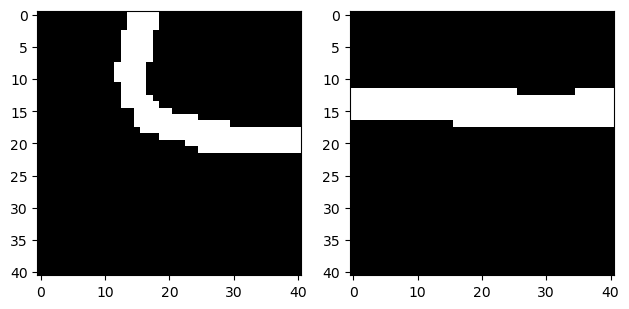

In [25]:
start_list = [0,5]
for start in start_list:
    img_def.img_filter_line_edgeA(image[index+1], image[index+2], 1, start=start, AB=10, method=['HH', 'VV'])
start_list = [0,5,10,15]
for start in start_list:
    img_def.img_filter_line_edgeA(image[index+1], image[index+2], 1, start=start, AB=20, method=['HH', 'VV'])
plot_a_b(smalla[index+1], smallb[index+1])

cntbb :    29480 : cntww :   616698 : cntrr :     6028 : trun  :       94
cntvv :        0 : cnthh :        0 : cnt4s :        0 : cntcc :      194
cnttl :        1 : cntbl :        5 : cnttr :        0 : cntbr :        0
cntbb :    29447 : cntww :   616731 : cntrr :     6137 : trun  :       88
cntvv :        0 : cnthh :        0 : cnt4s :        0 : cntcc :      165
cnttl :        3 : cntbl :        7 : cnttr :        0 : cntbr :        3


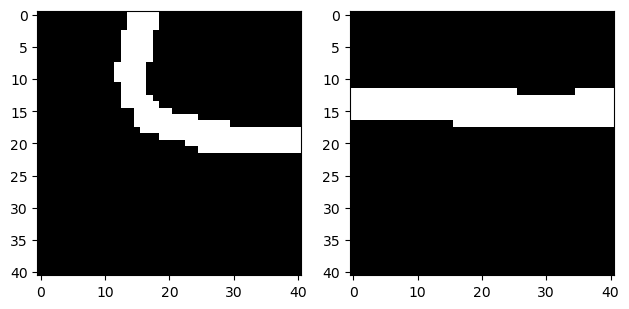

In [26]:
start_list = [0,5]
for start in start_list:
    img_def.img_filter_line_edgeA(image[index+1], image[index+2], 1, start=start, AB=10, method=['TL', 'BL', 'RT', 'BR'])
#start_list = [0,5,10,15]
#for start in start_list:
#    img_def.img_filter_line_edgeA(image[index+1], image[index+2], 1, start=start, AB=20, method=['TL', 'BL', 'RT', 'BR'])
plot_a_b(smalla[index+1], smallb[index+1])

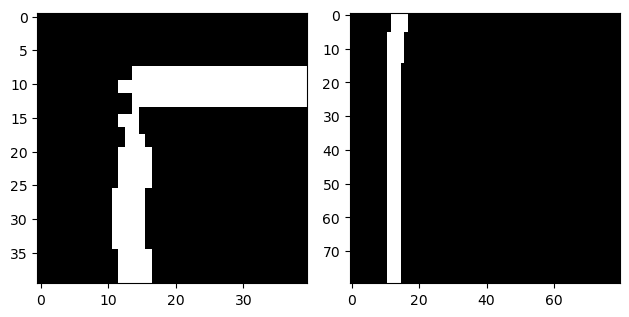

In [27]:
plot_a_b(image[index+1,20:60,20:60], image[index+1,120:200,20:100])

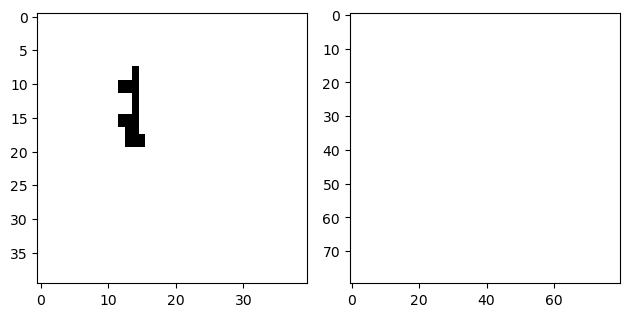

In [28]:
plot_a_b(image[index+2,20:60,20:60], image[index+2,120:200,20:100])

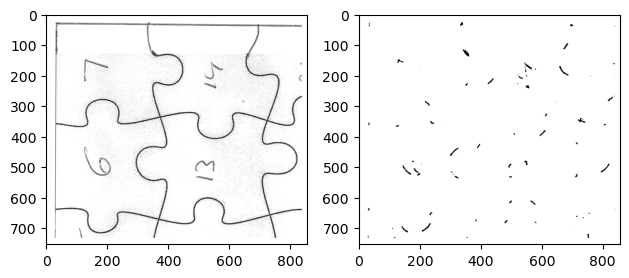

In [29]:
plot_a_b(image[0], image[index+2], 255, 1)

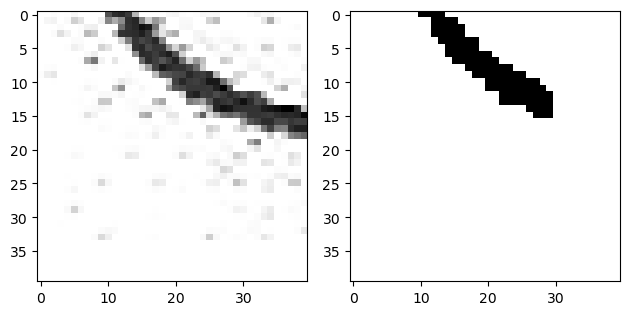

In [30]:
plot_a_b(image[0,700:740,130:170], image[index+2,700:740,130:170], 255, 1)

In [31]:
cntww,cntbb = [(image[index+2]==cnt).sum() for cnt in (0,1)]
print(cntww, cntbb)

3661 642517


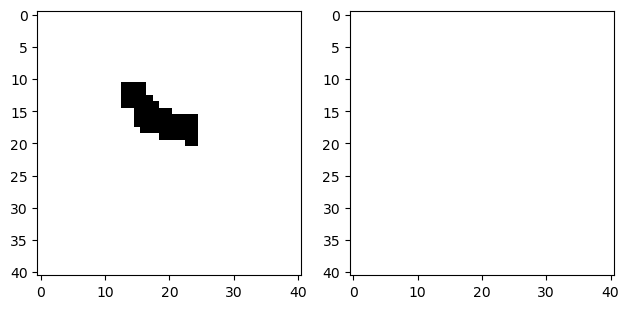

In [32]:
plot_a_b(smalla[index+2], smallb[index+2])

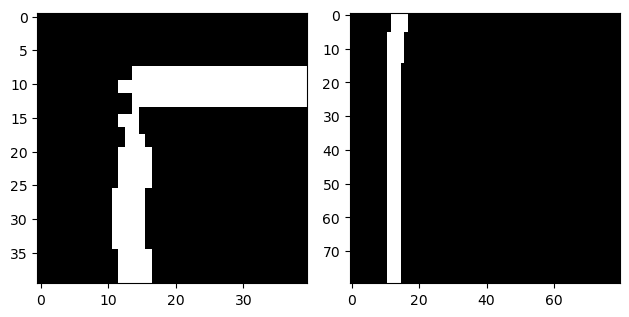

In [33]:
plot_a_b(image[index+1,20:60,20:60], image[index+1,120:200,20:100])

cntbb :    29117 : cntww :   617061 : cntrr :     1422 : trun  :       34
cntvv :        0 : cnthh :        0 : cnt4s :        0 : cntcc :       76
cnttl :        5 : cntbl :        3 : cnttr :        0 : cntbr :        9


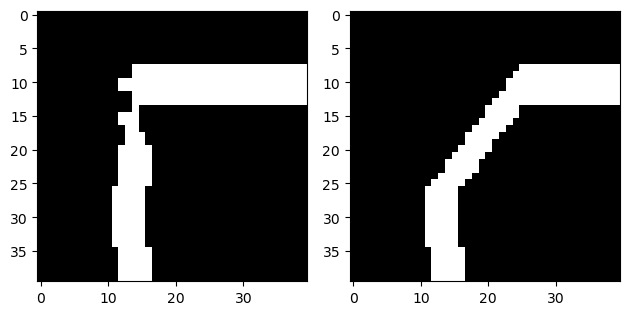

In [34]:
image[index+3] = image[index+1] + 0
image[index+4] = image[index+2] + 0
start_list = [15]
for start in start_list:
    img_def.img_filter_line_edgeA(image[index+3], image[index+4], 1, start=start, AB=20, method=['TL', 'BL', 'RT', 'BR'])
plot_a_b(image[index+1,20:60,20:60], image[index+3,20:60,20:60])

In [35]:
start = 15
AB=20
AB2=10
x=35
y=35
bl,br,at,ab = (y-AB2,y+AB2,x-AB2,x+AB2)
resultb = np.nonzero(image[index+1,ab,y - AB2:y + AB2+1])[0]
resultr = np.nonzero(image[index+1,x - AB2:x + AB2+1,br])[0]
flagr,xra,xrb,dxra,dxrb = img_def.img_filter_line_edge_side(resultr,x-AB2,AB)
flagb,yba,ybb,dyba,dybb = img_def.img_filter_line_edge_side(resultb,y-AB2,AB)
print(resultr)
print(resultb)
print(flagr,xra,xrb,dxra,dxrb)
print(flagb,yba,ybb,dyba,dybb)
vertices_list = []
vertices_list.append(np.array([[ab,yba], [ab,ybb], [xra,br], [xrb,br]]))
print(vertices_list)
print                                              (image[index+1,x-AB2:x+AB2+1,y-AB2:y+AB2+1])
sumbr,sumtr,sumtl,sumbl=img_def.img_filter_box_edge(image[index+1,x-AB2:x+AB2+1,y-AB2:y+AB2+1], AB)
print(sumbr,sumtr,sumtl,sumbl)
print([x-AB2,x+AB2+1,y-AB2,y+AB2+1])

[3 4 5 6 7 8]
[ 7  8  9 10 11]
2 28 33 3 12
2 32 36 7 9
[array([[45, 32],
       [45, 36],
       [28, 45],
       [33, 45]], dtype=int64)]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0

In [36]:
print(xra,xrb)
xra,xrb = (xra-0,xrb+1) if ((xrb-xra)%2==1) else (xra-0,xrb+0)
print(xra,xrb)
dxr = max(int((xrb - xra) / 2 - 2), 0)
print(dxr)
xra,xrb = (xra+dxr,xrb-dxr)
print(xra,xrb)

28 33
28 34
1
29 33
